In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [3]:
df = pd.read_csv("datasets/istanbul_stock_exchange.csv")
df

,date,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...,...
531,16-Feb-11,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
532,17-Feb-11,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
533,18-Feb-11,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
534,21-Feb-11,-0.013069,-0.013706,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


In [4]:
df.isnull().sum()

date             0
TL BASED ISE     0
USD BASED ISE    0
SP               0
DAX              0
FTSE             0
NIKKEI           0
BOVESPA          0
EU               0
EM               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['timestamp'] = df['date'].astype('int64') // 10**9
df_numeric = df.drop(columns=['date'])

C:\Users\prash\AppData\Local\Temp\ipykernel_21648\3938174352.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [8]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled,columns=df_numeric.columns)
df_scaled

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,timestamp
0,0.746889,0.664154,0.404333,0.489969,0.558409,0.451728,0.722875,0.530944,0.776771,0.000000
1,0.668147,0.628741,0.505990,0.546240,0.643736,0.489000,0.618569,0.519229,0.548080,0.001285
2,0.254242,0.314902,0.194024,0.310007,0.248066,0.606576,0.152590,0.273987,0.214765,0.002571
3,0.000000,0.000000,0.470147,0.364884,0.516936,0.093003,0.698163,0.373348,0.221615,0.003856
4,0.549467,0.509203,0.266894,0.291678,0.400483,0.411670,0.374747,0.326501,0.356172,0.005141
...,...,...,...,...,...,...,...,...,...,...
531,0.539854,0.529392,0.493360,0.487558,0.597004,0.502925,0.613904,0.481545,0.481694,0.992288
532,0.545277,0.543299,0.467534,0.459599,0.524650,0.475185,0.472073,0.416335,0.458533,0.993573
533,0.475748,0.448175,0.458172,0.496068,0.514491,0.456817,0.505584,0.426279,0.526836,0.994859
534,0.374650,0.383140,0.273345,0.342305,0.414130,0.463884,0.356235,0.312461,0.435419,0.998715


In [9]:
def create_sequences(data,seqence_length):
    sequences = []
    labels = []
    for i in range(len(data)-seqence_length):
        sequences.append(data[i:i+seqence_length])
        labels.append(data[i+seqence_length])
    return np.array(sequences),np.array(labels)

In [11]:
sequence_length = 10
x,y = create_sequences(df_scaled.values,sequence_length)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, shuffle=False)

In [13]:
model = Sequential([
    LSTM(64,return_sequences=True,input_shape=(sequence_length,x.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

C:\Anaconda_Jupyter\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
hist = model.fit(
    xtrain, ytrain,
    validation_data=(xtest, ytest),
    epochs=25,
    batch_size=32,
    verbose=1
)

Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - loss: 0.1400 - val_loss: 0.0245
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0322 - val_loss: 0.0280
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0257 - val_loss: 0.0291
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0262 - val_loss: 0.0241
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0251 - val_loss: 0.0260
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0230 - val_loss: 0.0266
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0259 - val_loss: 0.0260
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0242 - val_loss: 0.0260
Epoch 9/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0232 - val_loss: 0.0263
Epoch 10/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0230 - val_loss: 0.0259
Epoch 11/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0218 - val_loss: 0.0245
Epoch 12/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0

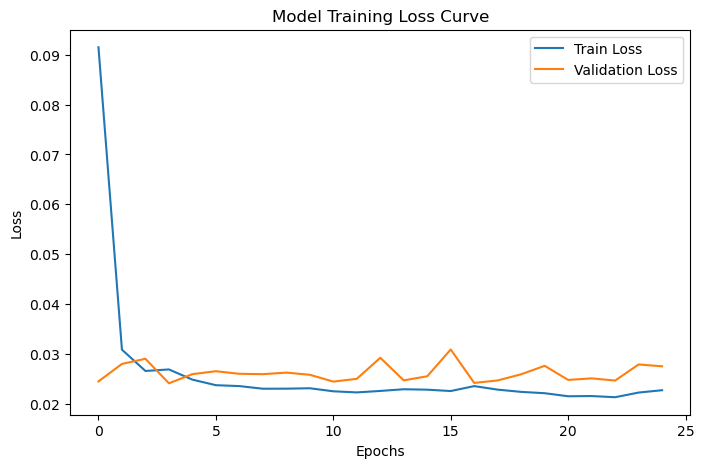

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Loss Curve')
plt.legend()
plt.show()

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [20]:
df = pd.read_csv("datasets/istanbul_stock_exchange.csv")
df

,date,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...,...
531,16-Feb-11,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
532,17-Feb-11,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
533,18-Feb-11,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
534,21-Feb-11,-0.013069,-0.013706,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


In [21]:
df = df.drop(columns=['date'])

In [22]:
df

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...
531,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
532,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
533,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
534,-0.013069,-0.013706,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.746889,0.664154,0.404333,0.489969,0.558409,0.451728,0.722875,0.530944,0.776771
1,0.668147,0.628741,0.505990,0.546240,0.643736,0.489000,0.618569,0.519229,0.548080
2,0.254242,0.314902,0.194024,0.310007,0.248066,0.606576,0.152590,0.273987,0.214765
3,0.000000,0.000000,0.470147,0.364884,0.516936,0.093003,0.698163,0.373348,0.221615
4,0.549467,0.509203,0.266894,0.291678,0.400483,0.411670,0.374747,0.326501,0.356172
...,...,...,...,...,...,...,...,...,...
531,0.539854,0.529392,0.493360,0.487558,0.597004,0.502925,0.613904,0.481545,0.481694
532,0.545277,0.543299,0.467534,0.459599,0.524650,0.475185,0.472073,0.416335,0.458533
533,0.475748,0.448175,0.458172,0.496068,0.514491,0.456817,0.505584,0.426279,0.526836
534,0.374650,0.383140,0.273345,0.342305,0.414130,0.463884,0.356235,0.312461,0.435419


In [31]:
def create_sequences(data,seqlen):
    x_sequences = []
    y_labels = []
    for i in range(len(data)-seqlen):
        x_sequences.append(data[i:i+seqlen])
        y_labels.append(data[i+seqlen])
    return np.array(x_sequences),np.array(y_labels)

In [36]:
seqlen = 10
x,y = create_sequences(df_scaled.values, seqlen)

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, shuffle=False)

In [39]:
xtrain.shape

(420, 10, 9)

In [44]:
def build_lstm_model():
    model = Sequential([
        LSTM(64,return_sequences=True,input_shape=(10,9)),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation="relu"),
        Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
# def build_rnn_model(vocab_size):
#     model = Sequential([
#         tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=100),
#         tf.keras.layers.SimpleRNN(64, return_sequences=True),
#         tf.keras.layers.SimpleRNN(32),
#         tf.keras.layers.Dense(16, activation='relu'),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(1, activation='sigmoid')
#     ])
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,485 (376.90 KB)

 Trainable params: 32,161 (125.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,324 (251.27 KB)

In [47]:
mymodel = build_lstm_model()
hist = mymodel.fit(
    xtrain, ytrain,
    validation_data=(xtest, ytest),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - loss: 0.1626 - val_loss: 0.0174
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0261 - val_loss: 0.0095
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0235 - val_loss: 0.0078
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0245 - val_loss: 0.0074
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0215 - val_loss: 0.0085
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0209 - val_loss: 0.0075
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0203 - val_loss: 0.0085
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0210 - val_loss: 0.0074
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0216 - val_loss: 0.0078
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0186 - val_loss: 0.0074
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0210 - val_loss: 0.0076
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0

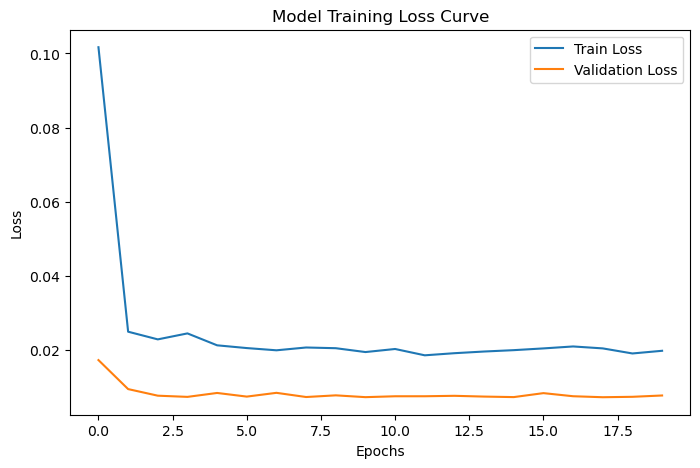

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Loss Curve')
plt.legend()
plt.show()